## Ensure you have Pandas, Matplotlib, and Seaborn installed in your environment. If you haven't installed them yet, you can do so by running:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset directly
df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Understand the Structure of the Data

In [3]:
# Check the structure and data types
print(df.info())

# Display basic statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

- info(): This function shows the number of non-null entries and the data types of each column.
- describe(): It provides summary statistics for numerical columns (like count, mean, standard deviation, etc.).

 ## Checking for Missing Values

Handling missing values is a critical step. Here’s how to identify and deal with them:

In [4]:
# Checking for missing values
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


- This line gives a count of missing values for each column.


- Fill with Mean/Median/Mode: For continuous variables (like age), you can fill missing values with the mean or median.
- Drop Rows/Columns: If a column has too many missing values, you might consider dropping it.

In [7]:
# Filling missing 'age' values with the mean
df['age'] = df['age'].fillna(df['age'].mean())

In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
# Filling missing 'embarked' with mode (most frequent value)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [11]:
# Dropping rows where 'deck' and 'embark_town' are missing (or you can fill them)
df = df.drop(columns=['deck', 'embark_town'])

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,yes,True


In [13]:
print(df.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64


Handling Duplicates:

In [14]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 111


In [15]:
df = df.drop_duplicates()

## 3. Exploratory Data Analysis (EDA)
EDA helps understand data distributions and relationships.

Descriptive Statistics:

In [16]:
# Get descriptive statistics
print(df.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   780.000000  780.000000   780  780.000000  780.000000  780.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   488         NaN         NaN         NaN   
mean      0.412821    2.246154   NaN   29.797600    0.525641    0.417949   
std       0.492657    0.854452   NaN   13.708883    0.988046    0.838536   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   21.750000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   29.699118    0.000000    0.000000   
75%       1.000000    3.000000   NaN   36.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   780.000000    

Visualizing Survival Rates:

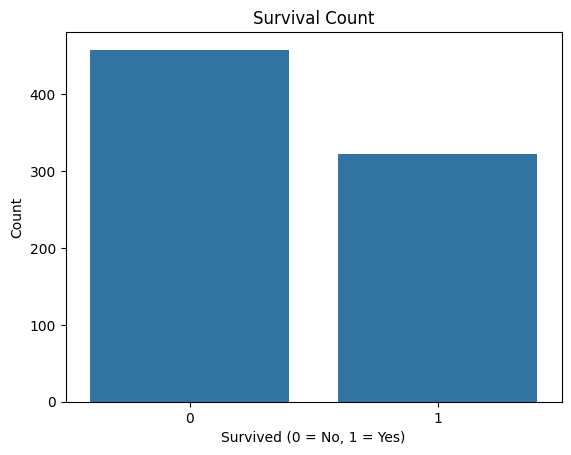

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for survival
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Survival Rate by Class and Gender:

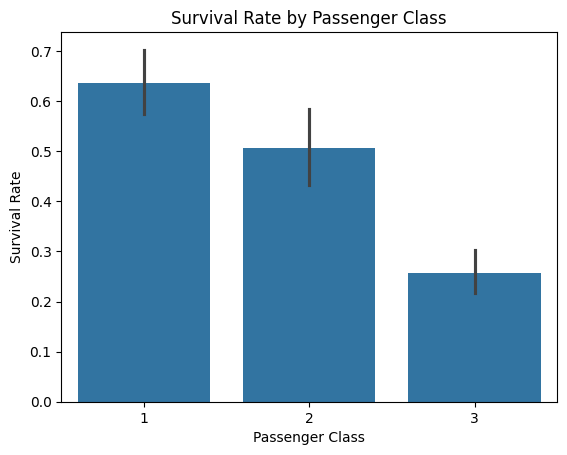

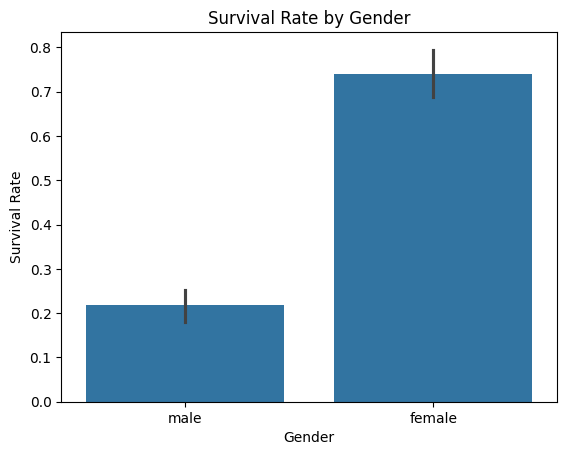

In [18]:
# Survival rate by class
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

# Survival rate by gender
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()